# ĐỒ ÁN CUỐI KÌ

| MSSV     | Họ và tên       | Github    |
|----------|-----------------|-----------|
| 19120467  | Ngô Hữu Đang | ngohuudang2001 |
| 18120464 | Nguyễn Văn Minh | MinhCr007 |

link [thùng chứa](https://github.com/ngohuudang2001/P4DS_FinalProject)

---

# Môi trường code

In [1]:
import sys
sys.executable

'C:\\ProgramData\\Anaconda3\\envs\\min_ds-env\\python.exe'

File chạy python sẽ là file của môi trường code "min_ds-env".

---

# Import các thư viện cần thiết

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

---

# A. THU THẬP DỮ LIỆU

**Dữ liệu đã được lấy trong một cuộc khảo sát về khóa học toán học ở trường trung học. Nó chứa rất nhiều thông tin xã hội, giới tính và nghiên cứu thú vị về sinh viên.**
> **Context**\
The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade

**Nguồn thông tin và cách thu thập dư liệu:**
>- P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
>- Fabio Pagnotta, Hossain Mohammad Amran.
>- Email:fabio.pagnotta@studenti.unicam.it, mohammadamra.hossain '@' studenti.unicam.it
>- University Of Camerino
 
**License: [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)**
>The person who associated a work with this deed has dedicated the work to the public domain by waiving all of his or her rights to the work worldwide under copyright law, including all related and neighboring rights, to the extent allowed by law. You can copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission.

**Bộ dữ liệu được thu thập từ  [kaggle](https://www.kaggle.com/uciml/student-alcohol-consumption)**

---

# B. KHÁM PHÁ VÀ TIỀN XỬ LÝ DỮ LIỆU

## Đọc dữ liệu từ file .csv

In [3]:
student_df = pd.read_csv("./Data/student-mat.csv", sep=',')

In [4]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [5]:
n_rows, n_cols = student_df.shape
print(n_rows, n_cols)

395 33


- Dữ liệu khảo sát của học sinh đối với môn toán có 395 dòng và 33 cột

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Quan sát sơ bộ dữ liệu ta thấy mỗi dòng chứa thông tin về một học sinh, có vẻ như không có vấn đề, các dòng có cùng ý nghĩa với nhau.

## Dữ liệu có các dòng bị lặp không?

In [6]:
student_df.duplicated().sum()

0

Vậy các dòng trong tập dữ liệu không bị trùng nhau

## Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả về  các cột trong file "student.txt":
- **school**: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira).
- **sex**: student's sex (binary: 'F' - female or 'M' - male)
- **age**: student's age (numeric: from 15 to 22)
- **address**: student's home address type (binary: 'U' - urban or 'R' - rural)
- **famsize**: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- **Pstatus**: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- **Medu**: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- **Fedu**:  father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- **Mjob**: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **Fjob**: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **reason**: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- **guardian**: student's guardian (nominal: 'mother', 'father' or 'other')
- **traveltime**: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- **studytime**: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **failures**: number of past class failures (numeric: n if 1<=n<3, else 4)
- **schoolsup**: extra educational support (binary: yes or no)
- **famsup**: family educational support (binary: yes or no)
- **paid**: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- **activities**: extra-curricular activities (binary: yes or no)
- **nursery**: attended nursery school (binary: yes or no)
- **higher**: wants to take higher education (binary: yes or no)
- **internet**: Internet access at home (binary: yes or no)
- **romantic**: with a romantic relationship (binary: yes or no)
- **famrel**: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- **freetime**: free time after school (numeric: from 1 - very low to 5 - very high)
- **goout**: going out with friends (numeric: from 1 - very low to 5 - very high)
- **Dalc**: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **Walc**: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **health**: current health status (numeric: from 1 - very bad to 5 - very good)
- **absences**: number of school absences (numeric: from 0 to 93)
- **G1**: first period grade (numeric: from 0 to 20)
- **G2**: second period grade (numeric: from 0 to 20)
- **G3**: final grade (numeric: from 0 to 20, output target)


## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [7]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Các cột dữ liệu hiện tại đều phù hợp

---

## Phân bố dữ liệu

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

In [8]:
def missing_ratio(s):
    return s.isna().mean() * 100
df = student_df.loc[:,student_df.dtypes == np.int64]
missing_df = df.agg([
    missing_ratio, 
])
nume_col_df = pd.concat([missing_df, df.describe()])
nume_col_df.round(1)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
count,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0,395.0
mean,16.7,2.7,2.5,1.4,2.0,0.3,3.9,3.2,3.1,1.5,2.3,3.6,5.7,10.9,10.7,10.4
std,1.3,1.1,1.1,0.7,0.8,0.7,0.9,1.0,1.1,0.9,1.3,1.4,8.0,3.3,3.8,4.6
min,15.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0
25%,16.0,2.0,2.0,1.0,1.0,0.0,4.0,3.0,2.0,1.0,1.0,3.0,0.0,8.0,9.0,8.0
50%,17.0,3.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,4.0,11.0,11.0,11.0
75%,18.0,4.0,3.0,2.0,2.0,0.0,5.0,4.0,4.0,2.0,3.0,5.0,8.0,13.0,13.0,14.0
max,22.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,75.0,19.0,19.0,20.0


### Với mỗi cột có kiểu dữ liệu dạng phân loại  (categorical), các giá trị được phân bố như thế nào?

In [9]:
def missing_ratio(s):
    return s.isna().mean() * 100
def num_diff_vals(s):
    return s.dropna().nunique()
def diff_vals(s):
    return s.dropna().unique()
def most_frequent(s):
    return s.value_counts().idxmax()
def most_infrequent(s):
    return s.value_counts().idxmin()
student_df.loc[:,student_df.dtypes != np.int64].agg([
    missing_ratio, 
    num_diff_vals,
    diff_vals,
    most_frequent,
    most_infrequent,
])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_diff_vals,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
diff_vals,"[GP, MS]","[F, M]","[U, R]","[GT3, LE3]","[A, T]","[at_home, health, other, services, teacher]","[teacher, other, services, health, at_home]","[course, other, home, reputation]","[mother, father, other]","[yes, no]","[no, yes]","[no, yes]","[no, yes]","[yes, no]","[yes, no]","[no, yes]","[no, yes]"
most_frequent,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
most_infrequent,MS,M,R,LE3,A,health,health,other,other,yes,no,yes,no,no,no,no,yes


---

# C. Đặt câu hỏi 

### Câu 1: Đâu là nguyên nhân chủ yếu dẫn tới kết quả học tập thấp của học sinh ?

### Câu 2: Mối quan hệ hẹn hò ảnh hướng tới kết quả học tập của các bạn nam, bạn nữ như thế nào ?

### Câu 3: Thời gian dành cho việc học ảnh hưởng như thế nào đến kết quả thi toán ?

### Câu 4: Uống rượu ảnh hưởng như thế nào đến kết quả kì thi Toán ?

## Tiền xử lí và phân tích dữ liệu để trả lời cho từng câu hỏi

### Câu 1: Đâu là  nguyên nhân chủ yếu dẫn tới kết quả học tập thấp của học sinh ?

#### Trả lời được câu hỏi nãy sẽ giúp ta :

- Biết được nguyên nhân ảnh hưởng đến kết quả học tập thấp của học sinh
- Tìm ra giải pháp để cải thiện kết quả học tập

Nguyên nhân ảnh hưởng tới kết quả học tập có thể kể đến như:
- Sử dụng nhiều rượu bia
- Mối quan hệ với gia đình không tốt
- Thời gian học ít
- Quan hệ tình cảm, hẹn hò
- Không muốn học đại học
- Sức khỏe không được tốt
- Thời gian tới trường lâu
- Nghỉ học nhiều
- Thất bại trong lớp học ở quá khứ (Mình dịch sát theo nghĩa của file mô tả, theo quan điểm cá nhân thì có thể là số lần ở lại lớp trong quá khứ)
- Không không chi trả cho các khóa học thêm
- Ba mẹ không sống cùng với nhau


### Tiền xử lý

- Thêm một `G_avg` để tính điểm trung bình bằng cách lấy cả 3 kì thi công lại chia cho 3
- Thêm cột mức độ uống rượu của học sinh `alc` bằng cách lấy cột mức độ uống rượu hàng ngày cộng với uống rượu cuối tuần
- Giá trị của thời gian học từ mức 1 đến 4 ta sẽ thay thế giá trị rõ hơn cho nó để dễ dàng quan sát.


In [10]:
#Tính điểm trung bình của 3 kì thi
student_df["G_avg"] = (student_df["G1"] + \
                       student_df["G2"] + \
                       student_df["G3"]) / 3
#Tính mức độ uống rượu của học sinh
student_df["alc"] = (student_df["Dalc"]+ student_df["Walc"])
#Chuyển về dạng phân loại cho trực quan hơn
student_df['studytime'] = student_df['studytime'].replace({
    1: '< 2 giờ',
    2: '2 - 5 giờ',
    3: '5 - 10 giờ',
    4: '> 10 giờ'
})

#### Các bước để trả lời cho câu hỏi trên:

**Bước 1:**

- Lấy ra danh sách các học sinh có điểm trung bình `G_avg` <10 và đặt tên là `bad_grade_df`
- Thêm các thuộc tính nhị phân là các nguyên nhân ở trên ,và tính toán để tìm ra thuộc tính có số học sinh chiếm nhiều nhất
 - `high_alc` có mức độ sử dụng rượu bia `alc` cao hơn 5
 - `bad_famrel` có chất lượng mối quan hệ gia đình `famrel` bé hơn 3
 - `low_studytime` có thời gian học tập `studytime` bé hơn 2 giờ
 - `dating` có mối quan hệ tình cảm, hẹn hò `romantic` = `yes`
 - `no_want_higher_edu` không muốn học đại học `higher` = `no`
 - `bad_health` có sức khỏe `health` bé hơn 3
 - `last_traveltime` có thời gian di chuyển `traveltime` lớn hơn bằng 3 (lớn hơn bằng 30 phút)
 - `many_absences` có số buổi nghỉ học `absences` lớn hơn 5 (trung vị tính được là 5)
 - `is_failure` đã từng bị thất bại `failure` lớn hơn 0
 - `no_paid` không chi trả cho các khóa học thêm `paid` = `no`
 - `A_Pstatus` Ba mẹ không sống chung với nhau `Pstatus` = `A`
 
**Bước 2:**
- Vẽ biểu đồ barh thể hiện số lượng học sinh ở mỗi nguyên nhân được nêu

**Bước 3:**
- trực quan hóa giá trị của nguyên nhân đối với những học sinh có điểm trung bình `G_avg` <10 và >=10 và đưa ra nhận xét


**Code bước 1**

In [11]:
bad_grade_df = student_df[student_df["G_avg"]<10]
good_grade_df = student_df[student_df["G_avg"]>=10]
bad_grade_df["high_alc"] = (bad_grade_df["alc"]) > 5
bad_grade_df["bad_famrel"] = bad_grade_df["famrel"] < 3
bad_grade_df["low_studytime"] = bad_grade_df["studytime"] == "< 2 giờ"
bad_grade_df["dating"] = bad_grade_df["romantic"] == "yes"
bad_grade_df["no_want_higher_edu"] = bad_grade_df["higher"] == "no"
bad_grade_df["bad_health"] = bad_grade_df["health"]<3
bad_grade_df["last_traveltime"] = bad_grade_df["traveltime"]>=3
bad_grade_df["many_absences"] = bad_grade_df["absences"]>5
bad_grade_df["is_failure"] = bad_grade_df["failures"]>0
bad_grade_df["no_paid"] = bad_grade_df["paid"]=="no"
bad_grade_df["A_Pstatus"] = bad_grade_df["Pstatus"]=="A"
df = bad_grade_df[["high_alc",
    "bad_famrel",
    "low_studytime",
    "dating",
    "no_want_higher_edu",
    "bad_health",
    "last_traveltime",
    "many_absences",
    "is_failure",
    "no_paid",
    "A_Pstatus"
   ]]
df = df.agg(lambda x : (x==1).sum())
df

high_alc              39
bad_famrel             9
low_studytime         48
dating                59
no_want_higher_edu    14
bad_health            34
last_traveltime       18
many_absences         64
is_failure            59
no_paid               94
A_Pstatus             15
dtype: int64

**Code bước 2**

Text(0.5, 1.0, 'Nguyên nhân dẫn đến kết quả học tập không tốt')

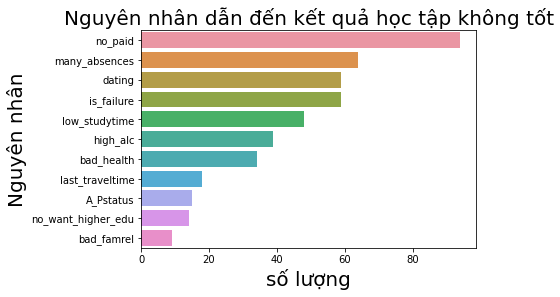

In [28]:
df = df.sort_values(ascending=False)
p = sns.barplot(y=df.keys(),x=df.values);
p.set_xlabel("số lượng",fontsize = 20)
p.set_ylabel("Nguyên nhân", fontsize = 20)
plt.title("Nguyên nhân dẫn đến kết quả học tập không tốt",
         fontsize = 20)

- Từ kết quả thống kể được, ta thấy nguyên nhân ảnh hưởng lớn nhất là không chi trả cho các khóa học thêm


**Code bước 3**

- Ta tiến hành kiểm chứng lại nguyên nhân này


In [13]:
labels = student_df["paid"].unique()
amount = student_df["paid"].value_counts()
amount2 = bad_grade_df["paid"].value_counts()
amount3 = good_grade_df["paid"].value_counts()
s = pd.concat([amount2,amount3])
s

no      94
yes     70
no     120
yes    111
Name: paid, dtype: int64

- Ta chuyển dòng `yes 70` xuống cuối để phù hợp với giá trị yes no của `paid` khi vẽ donut chart bằng cách lấy phần giá trị của series `s` và thực hiện di chuyển giá trị 70 xuống cuối

In [14]:
a = s.to_numpy()
a[1],a[2],a[3] =a[2],a[3],a[1]
a

array([ 94, 120, 111,  70], dtype=int64)

- Tiến hành vẽ đồ thị donut

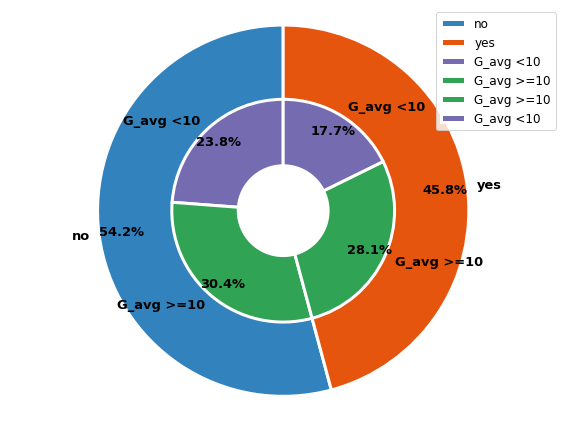

In [15]:
# Setting figure colors
cmap = plt.get_cmap("tab20c")
outer_colors = cmap([0,4])
inner_colors = cmap(np.array([12,8,8,12]))
# Setting the size of the figure
plt.figure(figsize=(8,6))
# Plotting the outer pie
plt.pie(amount, labels = student_df["paid"].unique(), 
       startangle=90, pctdistance =0.88 ,colors=outer_colors,
       autopct = '%1.1f%%', radius= 1.0, labeldistance=1.05,
       textprops ={ 'fontweight': 'bold','fontsize':13},
       wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" } )
# PLotting the inner pie
plt.pie(a,startangle=90, 
        labels = ["G_avg <10","G_avg >=10","G_avg >=10","G_avg <10"],
        pctdistance =0.85,colors=inner_colors,
        autopct = '%1.1f%%',
        radius= 0.60,
        textprops ={'fontweight': 'bold' ,'fontsize':13}, 
        wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" } )
# Creating the donut shape for the pie
centre_circle = plt.Circle((0,0), 0.25, fc='white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle) # adding the centre circle
# Plotting the pie 
plt.axis('equal')  # equal aspect ratio
plt.legend( loc=1, fontsize =12)
plt.tight_layout()

- Ta thấy được rõ hơn về ảnh hưởng của việc không chi trả phí cho khóa học thêm Toán, có tới 41.5% số học sinh đạt kết quả xấu thì việc không đi học thêm (chi trả phí cho các khóa học thêm) chiếm tới 23.8 %(tỉ lệ này đối với các nguyên nhân khác sẽ thấp hơn)
- Xét trên thực tế (điển hình như ở Việt Nam) những học sinh đạt kết quả không tốt đa phần là không đi học thêm 

**Nếu ta đặt trường hợp các bạn học sinh có kết quả xấu này đều đăng kí đi học thêm thì kết quả thu được sẽ thế nào nhỉ ?**
- Quan sát thống kê từ đồ thị ở trên cho thấy số lượng sinh viên có kết quả không tốt và có đi học thêm vẫn chiếm tỉ trọng khá cao trong tổng số sinh viên đạt kết quả không tốt (17.7% so với 41.5%)
- Điều này cho thấy dù có đi học thêm cũng không đảm bảo sẽ thu về kết quả tốt nếu ta không cố gắng học tập

**Kết luận**
- Theo như thống kê, việc không chi trả phí cho các khóa học thêm có ảnh hưởng tới kết quả học tập của học sinh nhiều hơn so với các nguyên nhân khác
- Nhưng trên thực tế,nguyên nhân này vẫn còn khá khách quan, không thể đảm bảo rằng sau khi khắc phục sẽ cải thiện hoàn toàn kết quả học tập cho học sinh

### Câu 2: Mối quan hệ hẹn hò ảnh hướng tới kết quả học tập của các bạn nam, bạn nữ như thế nào ?

#### Trả lời được câu hỏi nãy sẽ giúp ta :

- Biết được nam hay nữ sẽ bị ảnh hưởng nhiều hơn
- Từ đó đưa ra giải pháp thích hợp để khác phục 

#### Các bước để trả lời cho câu hỏi trên:

**Bước 1:**

- vẽ biểu đồ tròn thể hiện tỉ lệ nam nữ trong dữ liệu xem có gì bất ổn không ?

**Bước 2:**

- Vẽ biểu đồ bar plot thể hiện mức điểm trung bình `G1`, `G2`, `G3`, `G_avg` của các bạn nam, nữ khi có và không có mối quan hệ hẹn hò và đưa ra nhận xét.

**Code bước 1**

Text(0.5, 1.0, 'Tỉ lệ nam, nữ')

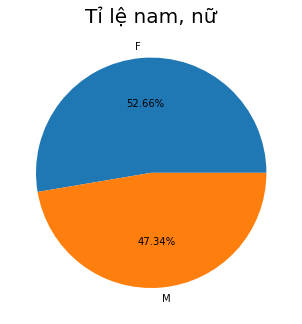

In [16]:
labels = student_df["sex"].unique()
amount = student_df["sex"].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(amount, labels = labels,autopct='%1.2f%%');
plt.title("Tỉ lệ nam, nữ",
         fontsize = 20)

- Tỉ lệ nam, nữ chênh lệch khá ít nên không ảnh hưởng nhiều tới kết quả bên dưới. 


**Code bước 2**

Text(0.5, 1.0, 'Kết quả học tập của nam, nữ khi không có và có hẹn hò')

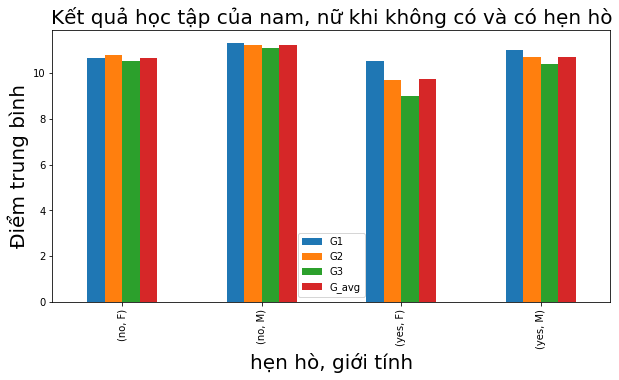

In [27]:
table = pd.pivot_table(data=student_df,index=['romantic','sex'])
p = table[["G1","G2","G3","G_avg"]].plot(kind='bar')
plt.gcf().set_size_inches(10,5)
p.set_ylabel("Điểm trung bình",fontsize = 20)
p.set_xlabel("hẹn hò, giới tính", fontsize = 20)
plt.title("Kết quả học tập của nam, nữ khi không có và có hẹn hò",
         fontsize = 20)

- Những học sinh không có mối quan hệ hẹn hò nào giúp cho điểm số `G1`, `G2`, `G3`, ổn định hơn so với những học sinh có mối quan hệ hẹn hò
- Có điểm đáng chú ý là điểm số của các bạn nam có mối quan hệ hẹn hò vẫn ở mức chấp nhận được (mức điểm trung bình >10), điểm số 3 bài kiểm tra không chênh lệch quá nhiều so với các bạn nữ. Điều này cho thấy tâm lí của các bạn nam vững vàng hơn, không để các mối quan hệ khác ảnh hưởng tới việc học
- Ngược lại với các bạn nam, điểm số 3 bài kiểm tra của các bạn nữ có mối quan hệ hẹn hò chênh lệch khá nhiều. Đầu năm học điểm số vẫn khá tốt nhưng đi đến cuối năm học thì điểm số ngày càng giảm. Điều này cho thấy được việc học của các bạn nữ dễ bị ảnh hưởng bởi các mối quan hệ bên ngoài

**Kết luận:**
- Việc yêu đương, hẹn hò ít nhiều cũng ảnh hưởng tới kết quả học tập. Khi mối quan hệ hẹn hò rạn nứt hoặc quá chìm đắm vào mối quan hệ này sẽ khiến cho ta lơ đãng đi việc học tập của mình. 
- Việc hẹn hò không xấu, nhưng chúng ta cần tránh để nó ảnh hưởng tới việc học tập. Ở trong khảo sát, các bạn nam đã làm điều này tốt hơn các bạn nữ


### Câu 3: Thời gian dành cho việc học ảnh hưởng như thế nào đến kết quả thi toán?

#### Trả lời được câu hỏi nãy sẽ giúp ta :

- Biết được để đạt được kết quả thi tốt nhất cho môn toán thì học sinh cần thời gian dành cho việc học bao nhiêu là hợp lý 
- Đưa ra được kế hoạch học tập cho riêng mình

#### Các bước để trả lời cho câu hỏi trên:
    

**Bước 1:**

- Xem tỉ lệ phần trăm các học sinh dành cho việc học là bao nhiêu bằng biểu đồ tròn

**Bước 2:**

- Vẽ biểu đồ box plot thể hiện điểm trung bình kết quả môn toán phụ thuộc vào thời gian học của học sinh như thế nào ?

**Code bước 1**

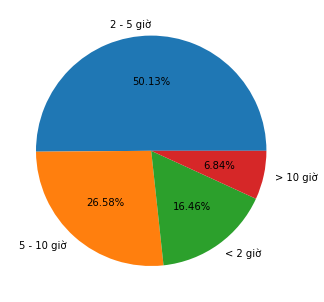

In [18]:
labels = student_df["studytime"].unique().tolist()
amount = student_df["studytime"].value_counts().tolist()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(amount, labels = labels,autopct='%1.2f%%');

- Hầu hết các học sinh dành từ 2 đến 5 giờ và 5 đến 10 giờ 1 tuần để học. 

**Code bước 2**

Text(0, 0.5, 'Thời gian học')

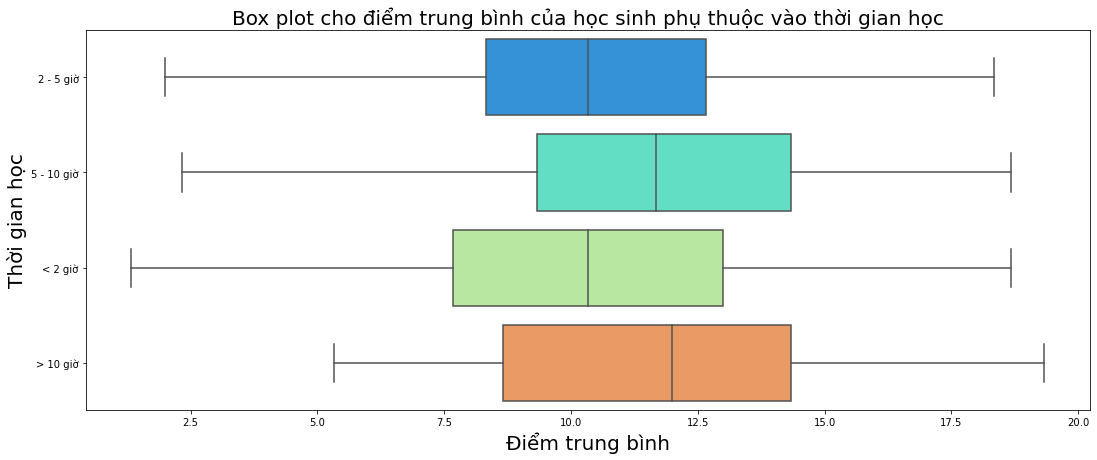

In [19]:
plt.figure(figsize=(18,7))
plt.title("Box plot cho điểm trung bình của học sinh phụ thuộc vào thời gian học",
         fontsize = 20)
sns.boxplot(y="studytime", 
            x="G_avg", 
            data = student_df, 
            orient="h", 
            palette = 'rainbow')
plt.xlabel("Điểm trung bình",fontsize = 20)
plt.ylabel("Thời gian học",fontsize = 20)

- Kết quả trung bình thấp nhất được chỉ ra bởi những sinh viên dành ít hơn hai giờ một tuần để học tập. Điều đó là tất nhiên ! Mình là sinh viên mình có thể thấy được thời gian này là không đủ.
- Rất ít sinh viên dành 10 giờ 1 tuần để học. Nhưng điều đó cho ta thấy kết quả rất tốt. 

**Kết luận**

- Chúng ta nên chăm chỉ học tập hơn, dành nhiều thời gian để mài dũa kỹ năng, học tập của mình để đạt được kết quả tốt nhất

### Câu 4: Uống rượu ảnh hưởng như thế nào đến kết quả kì thi Toán ?

#### Trả lời được câu hỏi nãy sẽ giúp ta :


- Biết được học sinh uống rượu có phải là tốt
- Đưa ra phương án với mỗi học sinh có đặc điểm gì thì tốt nhất không nên uống rượu
- Có thể đưa ra kinh nghiệm cho bản thân mình có nên uống rượu không

#### Các bước thực hiện

**Bước 1:** 

- Chia thành 5 mức độ uống rượu là Rất ít, Ít, Bình Thường, Nhiều và Rất nhiều

**Bước 2:** 

- Vẽ biểu đồ tròn và cột để xem tỉ lệ và số học sinh uống rượu theo từng mức độ như thế nào

**Bước 3:** 

- Vẽ biểu đồ cột thể hiện việc uống rượu của sinh ảnh hưởng đến điểm trung bình theo các đặc điểm giới tính, trường, quan hệ hẹn hò, sức khỏe, khu vực 


**Code bước 1**

In [20]:
bins=[0, 2, 4, 6, 8, 10]
labels=['Rất ít', 'Ít', 'Bình thường','Nhiều', 'Rất nhiều']
student_df['alcohol'] = pd.cut(student_df["alc"], bins,labels=labels)
student_df['alcohol'].value_counts().sort_index()

Rất ít         150
Ít             126
Bình thường     80
Nhiều           26
Rất nhiều       13
Name: alcohol, dtype: int64

**Code bước 2**

Text(0.5, 1.0, 'Số lượng sinh viên uống rượu')

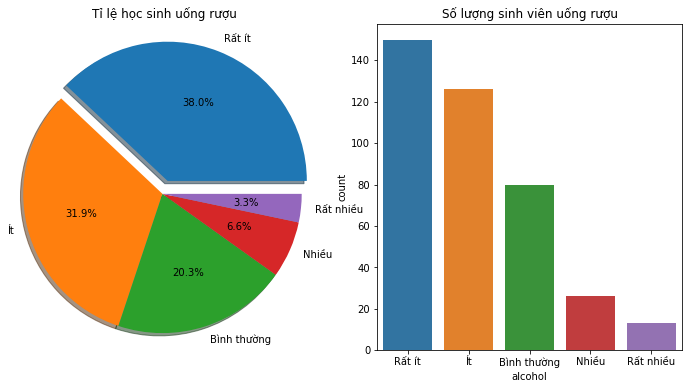

In [21]:
# Pie plot & Bar plot
sizes = student_df['alcohol'].value_counts()[labels]
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
# #plotting pie plot
ax1.pie(sizes,
        explode=explode, 
        labels=labels,
        autopct='%1.1f%%', 
        shadow=True);
ax1.axis('equal')
ax1.set_title("Tỉ lệ học sinh uống rượu")
#plotting bar plot
sns.countplot(x="alcohol", data=student_df, ax=ax2).set_title("Số lượng sinh viên uống rượu")

- Tỉ lệ học sinh uống rượu ít và rất ít chiếm hơn một nửa

**Code bước 3**

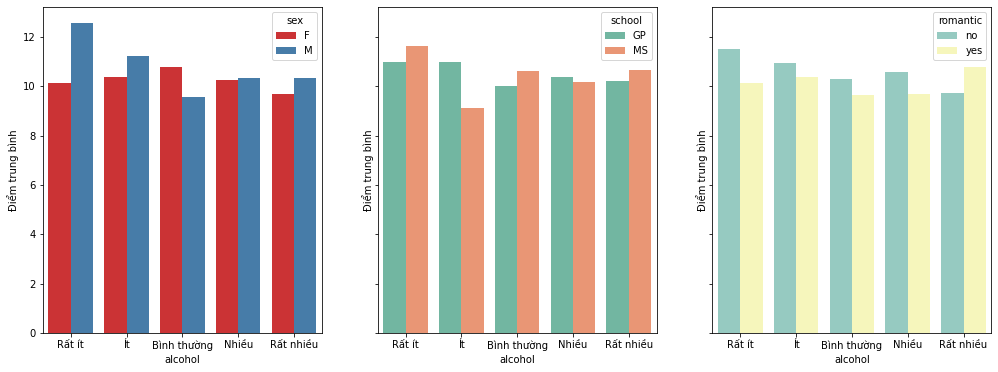

In [22]:
def bivariatte_barplot(df, x="alcohol", y="G_avg", hue=None, ax=None, color_set=1):
    pivtab_ser = df.groupby([x, hue])[y].mean().reset_index()
    #plotting
    sns.barplot(x=x, y=y, hue=hue,
                data=pivtab_ser, ax=ax,
                palette="Set%s"%(color_set+1)).set_ylabel("Điểm trung bình")
hues = ['sex', 'school', 'romantic']
#plotting
fig, axes = plt.subplots(1, len(hues), figsize=(17,6), sharey=True)
for idx, hue in enumerate(hues):
    bivariatte_barplot(student_df, 
                         hue=hue, 
                         ax=axes[idx], 
                         color_set=idx)

- Có vẻ như giới tính là nam thì uống rượu rất ít nhất thì kết quả học tập sẽ là cao nhất. Ngược lại một điều thú vị là nữ khi mức độ uống rượu bình thường lại cho kết quả thi cao nhất.
- Đối với trường Gabriel Pereira thì các cột uống rượu khá đồng đều nhau nhưng việc uống rượu rất ít sẽ đem lại điểm trung bình cao nhất cho học sinh. Đối với học sinh trường Mousinho da Silveira uống rượu ít sẽ đem lại kết quả tốt.
- Đối với những học sinh không có mối quan hệ hẹn hò thì việc uống rượu rất ít cho kết quả thi cao nhất và ổn định hơn các học sinh có mối quan hệ hẹn hò. Điều thú vị thì học sinh có mối quan hệ hẹn hò thì họ sẽ uống rất nhiều rượu và cho kết quả thi cao nhất.


==> Uống rượu ít sẽ đem lại kết quả thi tốt nhất với những mặt khác nhau

**Ta coi những học sinh khỏe mạnh có chỉ số health lớn hơn hoặc bằng 3**

In [23]:
student_df["is_healthy"] = student_df["health"]>=3

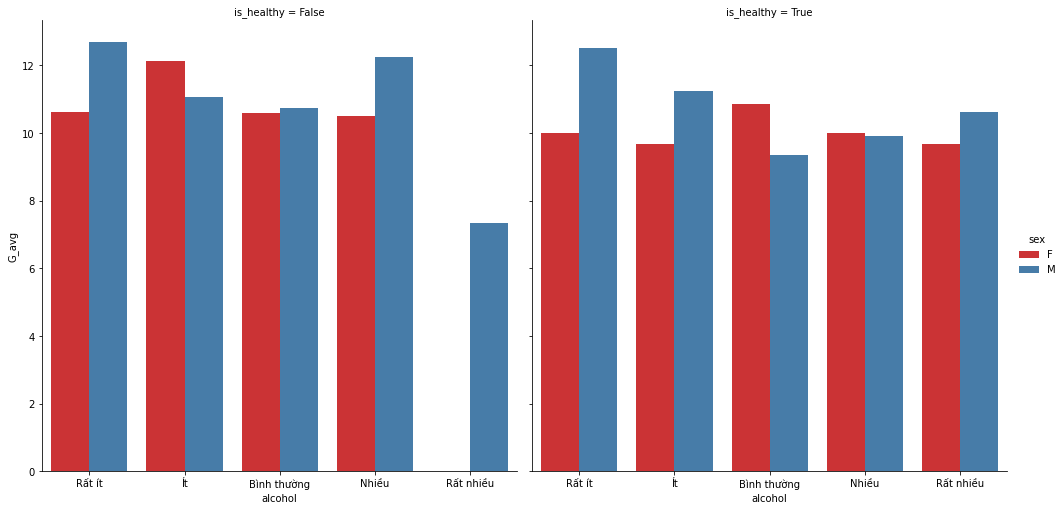

In [24]:
def multivariatte_factplot(x="alcohol", y="G_avg", hue="sex", col="is_healthy", df=pd.DataFrame(), cs=1):
    piv_tab = df.groupby([x, hue, col])[y].mean().reset_index()
    sns.factorplot(x=x, y=y, hue=hue, col=col, data=piv_tab, kind='bar', palette="Set%s"%cs, size=7);
multivariatte_factplot(df=student_df);

- Nhận thấy điều thú vị là nam  nếu sức khỏe không khỏe mạnh với việc uống nhiều rượu của mình thì lại có thành tích học tập tốt nhưng việc uống rượu rất ít sẽ cho kết quả thi cao nhất. Còn đối với nữ thì kết quả thi trung bình của nữ khi uống rượu rất ít, bình thường , nhiều lại khá đồng đều nhau, uống rượu ít sẽ cho kết quả thi tốt nhất
- Điều lạ lùng, khó hiểu thì nam giới khỏe mạnh uống rượu bình thường lại kém hơn rất nhiều với những người nam giới không khỏe mạnh.
- Nữ không khỏe mạnh uống rượu ít lại hoạt động tốt nhất trong các nhóm nữ, có lẽ nếu đúng liều lượng sẽ giúp tâm trạng vui vẻ nâng cao hiệu suất học tập.
- Một điều có thể chắc chắn rằng nếu sức khỏe không tốt thêm việc uống nhiều rượu nhất thì chắn chắc điểm sẽ thấp nhất mà thôi

==> Ta lại thấy được uống rượu rất ít với tình trạng sức khỏe như thế nào đi nữa cũng sẽ cho kết quả thi tốt nhất

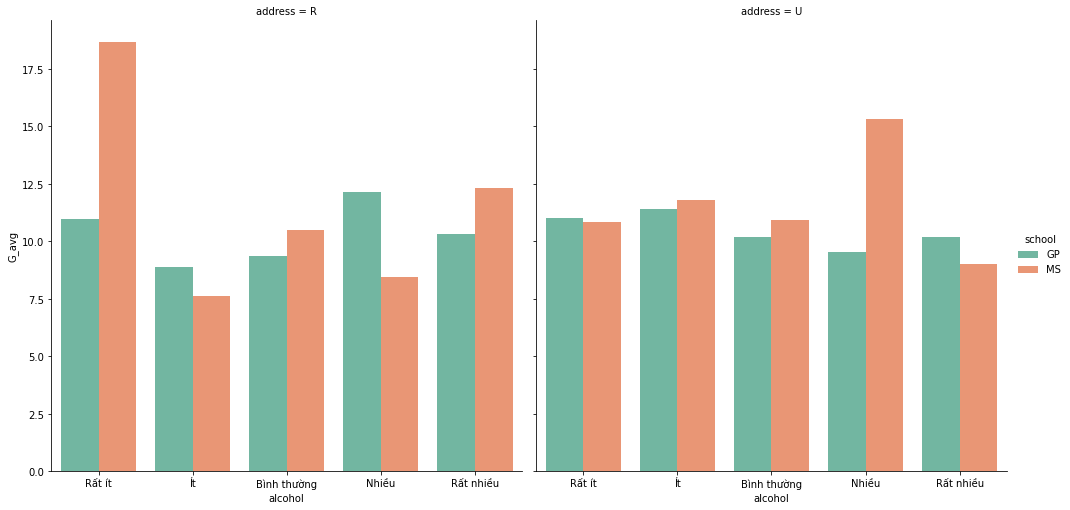

In [25]:
multivariatte_factplot(hue="school", col="address", df=student_df, cs=2)

- Đầu tiên ta có thể thấy được đa số học sinh trường MS có điểm thi trung bình tốt hơn học sinh trường GP theo từng nhóm uống rượu.
- Ở vùng nông thôn thì những học sinh không thường uống rượu đặc biệt học sinh trường MS, uống rượu rất ít thì đạt điểm số cao hơn rất nhiều so với các nhóm khác.Thật ngạc nhiên ở nông thôn học sinh MS uống rất nhiều rượu lại có kết quả thi tốt hơn các nhóm còn lại. Cho thấy các học sinh đó quản lý tốt thời gian học và vui chơi của mình.
- Ở khu vực thành thị thì điểm trung bình phân bố đồng đều hơn. Điều thú vị thì những học sinh MS uống nhiều rượu cho kết quả cao nhất. Cũng có thể việc uống rượu sẽ giúp học sinh thành thị giải tỏa áp lực học tập giúp nâng cao hiệu suất học tập của mình


==> Qua đó có thể thấy được việc hạn chế uống rượu sẽ  giúp học sinh học tập tốt hơn, ổn định hơn về nhiều khía cạnh khác nhau

# D. Nhìn lại quá trình làm đồ án

## Đã gặp những khó khăn gì? 

**Ngô Hữu Đang**
- Khó khăn trong việc sử dụng git, github khi làm việc nhóm
- 2 người thuộc 2 khóa khác nhau nên công việc chủ yếu trao đổi qua tin nhắn

**Nguyễn Văn Minh**
- Khó khăn trong việc đặt câu hỏi và trả lời để làm sao để người đọc dễ nhìn thấy vấn đề và dễ hiểu.
- Thời gian gấp rút do nhiều môn xảy ra đồ án cùng thời điểm
- Thời gian tiếp cận, sử dụng python, numpy, pandas khá ít

## Có học được gì hữu ích? (Hay không học được gì)

**Ngô Hữu Đang**
- Học được cách sử dụng git, github khi làm việc nhóm
- Học được cách trình bày các đồ thị sao cho dễ so sánh

**Nguyễn Văn Minh**
- Đã có kinh nghiệm trong việc phân tích dữ liệu như dùng pandas, matplotlib,...
- Nắm vững hơn về quy trình khoa học dữ liệu
- Biết cách xử lý, phân tích dữ liệu để trả lời câu hỏi

## Nếu có thêm thời gian thì sẽ làm gì?

- Sẽ tìm hiểu thêm các thư viện khác trong việc trực quan và phân tích.
- Đặt thêm câu hỏi cho các vấn đề
- Áp dụng học máy để dự đoán điểm thi môn toán 

# Tài liệu tham khảo

- Dữ liệu trên Kaggle: https://www.kaggle.com/lhwvong/students-alcohol-consumption-analysis
- HW2,HW3